# Data Analysis on Public Education Dataset

In [64]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import matplotlib.pyplot as plt
import requests
from scipy.stats import linregress

# Import API key
from api_keys import geoapify_key

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

### 1. Introduction

The goal of this data analysis project is to compare and analyze public and private colleges in the United States. The project aims to explore various factors such as enrollment, tuition fees, graduation rates, student-faculty ratios, and financial aid availability to gain insights into the similarities and differences between public and private institutions.

### 2. Data Wrangling

In [65]:
raw_data = pd.read_csv("data/MERGED2021_22_PP.csv",low_memory=False)

raw_data.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,BBRR4_PP_MALE_DISCHARGE,BBRR4_PP_NOMALE_N,BBRR4_PP_NOMALE_DFLT,BBRR4_PP_NOMALE_DLNQ,BBRR4_PP_NOMALE_FBR,BBRR4_PP_NOMALE_DFR,BBRR4_PP_NOMALE_NOPROG,BBRR4_PP_NOMALE_MAKEPROG,BBRR4_PP_NOMALE_PAIDINFULL,BBRR4_PP_NOMALE_DISCHARGE
0,100654,100200.0,1002.0,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed
1,100663,105200.0,1052.0,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu/,https://tcc.ruffalonl.com/University of Alabam...,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed
2,100690,2503400.0,25034.0,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,https://www.amridgeuniversity.edu/,https://www2.amridgeuniversity.edu:9091/,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed
3,100706,105500.0,1055.0,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu/,finaid.uah.edu/,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed
4,100724,100500.0,1005.0,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed


#### 2.1 Data Description

Institution-level data files for 1996-97 through 2020-21 containing aggregate data for each institution. Includes information on institutional characteristics, enrollment, student aid, costs, and student outcomes.

#### 2.2 Data Exploration

In [66]:
#pd.set_option('display.max_rows', None)

# Calculate the sum of null values for each column
null_sum = raw_data.isnull().sum()  

# Get the total number of rows in the DataFrame
column_count = len(raw_data)  

 # Calculate the percentage of null values for each column
null_percentage = (null_sum / column_count) 

# Filter the results to include only columns with null percentage less than 30%
filtered_results = null_percentage[null_percentage < 0.3]
print(filtered_results.to_frame())

                                   0
UNITID                      0.000000
OPEID                       0.003057
OPEID6                      0.003057
INSTNM                      0.000000
CITY                        0.000000
...                              ...
BBRR4_PP_NOMALE_DFR         0.000000
BBRR4_PP_NOMALE_NOPROG      0.000000
BBRR4_PP_NOMALE_MAKEPROG    0.000000
BBRR4_PP_NOMALE_PAIDINFULL  0.000000
BBRR4_PP_NOMALE_DISCHARGE   0.000000

[732 rows x 1 columns]


In [67]:
select_data = raw_data[[
    "UNITID",
    "INSTNM",
    "CITY",
    "STABBR",
    "ZIP",
    "MAIN",
    "HIGHDEG",
    "LATITUDE",
    "LONGITUDE",
    "CONTROL",
    "OPENADMP",
    "HBCU",
    "PBI",
    "ANNHI",
    "TRIBAL",
    "AANAPII",
    "HSI",
    "NANTI",
    "MENONLY",
    "WOMENONLY",
    "PCIP01",
    "PCIP03",
    "PCIP04",
    "PCIP05",
    "PCIP09",
    "PCIP10",
    "PCIP11",
    "PCIP12",
    "PCIP13",
    "PCIP14",
    "PCIP15",
    "PCIP16",
    "PCIP19",
    "PCIP22",
    "PCIP23",
    "PCIP24",
    "PCIP25",
    "PCIP26",
    "PCIP27",
    "PCIP29",
    "PCIP30",
    "PCIP31",
    "PCIP38",
    "PCIP39",
    "PCIP40",
    "PCIP41",
    "PCIP42",
    "PCIP43",
    "PCIP44",
    "PCIP45",
    "PCIP46",
    "PCIP47",
    "PCIP48",
    "PCIP49",
    "PCIP50",
    "PCIP51",
    "PCIP52",
    "PCIP54",
    "UGDS",
    "UGDS_WHITE",
    "UGDS_BLACK",
    "UGDS_HISP",
    "UGDS_ASIAN",
    "UGDS_AIAN",
    "UGDS_NHPI",
    "UGDS_2MOR",
    "UGDS_NRA",
    "UGDS_UNKN",
    "COSTT4_A",
    "COSTT4_P",
    "TUITFTE",
    "INEXPFTE",
    "PCTPELL",
    "PCTFLOAN",
    "UG25ABV",
    "UGDS_MEN",
    "UGDS_WOMEN",
    "SCHTYPE", 
    "STUFACR",
    "IRPS_2MOR",
    "IRPS_AIAN",
    "IRPS_ASIAN",
    "IRPS_BLACK",
    "IRPS_HISP",
    "IRPS_NHPI",
    "IRPS_NRA",
    "IRPS_UNKN",
    "IRPS_WHITE",
    "IRPS_WOMEN",
    "IRPS_MEN"
]]

column_dictionary = {
    "UNITID":"id",
    "INSTNM":"name",
    "CITY":"city",
    "STABBR":"state",
    "ZIP":"zipcode",
    # 1: main campus, 0: not main campus
    "MAIN" : "main_campus",
    # "Highest degree awarded 0 Non-degree-granting, 1 Certificate degree, 2 Associate degree, 3 Bachelor's degree, 4 Graduate degree"
    "HIGHDEG":"highest_degree",
    "LATITUDE":"lat",
    "LONGITUDE":"lng",
    "CONTROL" : "control",
    "OPENADMP" : "openadmp",
    # 1: yes, 0: no
    "HBCU":"historicalblack_college",
    "PBI":"black_college",
    "ANNHI":"native_college",
    "TRIBAL":"tribal_college",
    "AANAPII":"asian_college",
    "HSI":"hispanic_college",
    "NANTI":"native_college",
    "MENONLY":"men_college",
    "WOMENONLY":"women_college",
    "PCIP01":"percentage_of_agriculture_major",
    "PCIP03":"percentage_of_conservation_major",
    "PCIP04":"percentage_of_architecture_major",
    "PCIP05":"percentage_of_ethniic_major",
    "PCIP09":"percentage_of_communication_major",
    "PCIP10":"percentage_of_techincalsupport_major",
    "PCIP11":"percentage_of_computerscience_major",
    "PCIP12":"percentage_of_culinary_major",
    "PCIP13":"percentage_of_education_major",
    "PCIP14":"percentage_of_engineer_major",
    "PCIP15":"percentage_of_engineertech_major",
    "PCIP16":"percentage_of_language_major",
    "PCIP19":"percentage_of_family_major",
    "PCIP22":"percentage_of_legal_major",
    "PCIP23":"percentage_of_english_major",
    "PCIP24":"percentage_of_humanities_major",
    "PCIP25":"percentage_of_science_major",
    "PCIP26":"percentage_of_biology_major",
    "PCIP27":"percentage_of_math_major",
    "PCIP29":"percentage_of_appliedscience_major",
    "PCIP30":"percentage_of_interdisciplinary_major",
    "PCIP31":"percentage_of_fitness_major",
    "PCIP38":"percentage_of_philosophy_major",
    "PCIP39":"percentage_of_theology_major",
    "PCIP40":"percentage_of_physic_major",
    "PCIP41":"percentage_of_sciencetech_major",
    "PCIP42":"percentage_of_psychology_major",
    "PCIP43":"percentage_of_security_major",
    "PCIP44":"percentage_of_administration_major",
    "PCIP45":"percentage_of_sociology_major",
    "PCIP46":"percentage_of_trade_major",
    "PCIP47":"percentage_of_mechanic_major",
    "PCIP48":"percentage_of_production_major",
    "PCIP49":"percentage_of_transportation_major",
    "PCIP50":"percentage_of_visualart_major",
    "PCIP51":"percentage_of_health_major",
    "PCIP52":"percentage_of_business_major",
    "PCIP54":"percentage_of_history_major",
    "UGDS":"student_count",
    "UGDS_WHITE":"enrollment_proportion_white",
    "UGDS_BLACK":"enrollment_proportion_black",
    "UGDS_HISP":"enrollment_proportion_hispanic",
    "UGDS_ASIAN":"enrollment_proportion_asian",
    "UGDS_AIAN":"enrollment_proportion_native",
    "UGDS_NHPI":"enrollment_proportion_pacific",
    "UGDS_2MOR":"enrollment_proportion_mix",
    "UGDS_NRA":"enrollment_proportion_nonresident",
    "UGDS_UNKN":"enrollment_proportion_unknown",
    "COSTT4_A" : "cost_of_admission",
    "COSTT4_P" : "cost_of_admission_p",
    "TUITFTE":"tuition",
    "INEXPFTE":"instructional_expenditure",
    "PCTPELL":"percentage_of_pellgrant",
    "PCTFLOAN":"percentage_of_federalloan",
    "UG25ABV":"pecentage_of_over25",
    "UGDS_MEN":"enrollment_percentage_man",
    "UGDS_WOMEN":"enrollment_percentage_women",
    "SCHTYPE": "public/private",
    "STUFACR":"faculity_ratio_student",
    "IRPS_2MOR":"faculity_ratio_mix",
    "IRPS_AIAN":"faculity_ratio_native",
    "IRPS_ASIAN":"faculity_ratio_asian",
    "IRPS_BLACK":"faculity_ratio_black",
    "IRPS_HISP":"faculity_ratio_hispanic",
    "IRPS_NHPI":"faculity_ratio_pacific",
    "IRPS_NRA":"faculity_ratio_nonresident",
    "IRPS_UNKN":"faculity_ratio_unknown",
    "IRPS_WHITE":"faculity_ratio_white",
    "IRPS_WOMEN":"faculity_ratio_women",
    "IRPS_MEN":"faculity_ratio_men"
}

# Make a copy of the DataFrame
rename_data = select_data.copy()

# Rename the columns using the dictionary
rename_data.rename(columns=column_dictionary, inplace=True)

# merging cost and admission columns
rename_data["cost_of_admission"] = rename_data["cost_of_admission"].combine_first(rename_data["cost_of_admission_p"])


In [68]:
test_location = rename_data[[
    "id",
    "name",
    "city",
    "state",
    "main_campus",
    "highest_degree",
    "zipcode",
    "lat",
    "lng",
    "student_count",
    "public/private",
    "control",
    "openadmp"
]]


test_location_clean = test_location.dropna()
test_location_clean.head()

,id,name,city,state,main_campus,highest_degree,zipcode,lat,lng,student_count,public/private,control,openadmp
0,100654,Alabama A & M University,Normal,AL,1,4,35762,34.783368,-86.568502,5098.0,1.0,1,2.0
1,100663,University of Alabama at Birmingham,Birmingham,AL,1,4,35294-0110,33.505697,-86.799345,13284.0,1.0,1,2.0
2,100690,Amridge University,Montgomery,AL,1,4,36117-3553,32.362609,-86.174010,251.0,2.0,2,1.0
3,100706,University of Alabama in Huntsville,Huntsville,AL,1,4,35899,34.724557,-86.640449,7358.0,1.0,1,2.0
4,100724,Alabama State University,Montgomery,AL,1,4,36104-0271,32.364317,-86.295677,3495.0,1.0,1,2.0


In [69]:
test_type = rename_data[[
    "id",
    "name",
    "historicalblack_college",
    "black_college",
    "native_college",
    "tribal_college",
    "asian_college",
    "hispanic_college",
    "native_college",
    "men_college",
    "women_college"
]]

test_type_clean = test_type.dropna()
test_type_clean.head()

,id,name,historicalblack_college,black_college,native_college,native_college,tribal_college,asian_college,hispanic_college,native_college,native_college,men_college,women_college
0,100654,Alabama A & M University,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100663,University of Alabama at Birmingham,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100690,Amridge University,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100706,University of Alabama in Huntsville,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100724,Alabama State University,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
test_ethnicity = rename_data[[
    "id",
    "name",
    "enrollment_proportion_white",
    "enrollment_proportion_black",
    "enrollment_proportion_hispanic",
    "enrollment_proportion_asian",
    "enrollment_proportion_native",
    "enrollment_proportion_pacific",
    "enrollment_proportion_mix",
    "enrollment_proportion_nonresident",
    "enrollment_proportion_unknown",
    "enrollment_percentage_man",
    "enrollment_percentage_women",
    "faculity_ratio_student",
    "faculity_ratio_mix",
    "faculity_ratio_native",
    "faculity_ratio_asian",
    "faculity_ratio_black",
    "faculity_ratio_hispanic",
    "faculity_ratio_pacific",
    "faculity_ratio_nonresident",
    "faculity_ratio_unknown",
    "faculity_ratio_white",
    "faculity_ratio_women",
    "faculity_ratio_men"
]]

test_ethnicity_clean = test_ethnicity.dropna()
test_ethnicity_clean.head()

,id,name,enrollment_proportion_white,enrollment_proportion_black,enrollment_proportion_hispanic,enrollment_proportion_asian,enrollment_proportion_native,enrollment_proportion_pacific,enrollment_proportion_mix,enrollment_proportion_nonresident,...,faculity_ratio_native,faculity_ratio_asian,faculity_ratio_black,faculity_ratio_hispanic,faculity_ratio_pacific,faculity_ratio_nonresident,faculity_ratio_unknown,faculity_ratio_white,faculity_ratio_women,faculity_ratio_men
0,100654,Alabama A & M University,0.0184,0.8978,0.0114,0.0014,0.0027,0.0010,0.0108,0.0086,...,0.0047,0.0995,0.6540,0.0000,0.0000,0.0758,0.0095,0.1469,0.5024,0.4976
1,100663,University of Alabama at Birmingham,0.5297,0.2458,0.0669,0.0767,0.0021,0.0004,0.0483,0.0233,...,0.0015,0.1575,0.0619,0.0319,0.0012,0.0569,0.0004,0.6808,0.4433,0.5567
2,100690,Amridge University,0.2470,0.6932,0.0438,0.0000,0.0000,0.0040,0.0000,0.0000,...,0.0000,0.0000,0.0294,0.0000,0.0000,0.0000,0.0000,0.9706,0.1471,0.8529
3,100706,University of Alabama in Huntsville,0.7196,0.0871,0.0610,0.0357,0.0080,0.0012,0.0446,0.0166,...,0.0085,0.1823,0.0513,0.0256,0.0000,0.0484,0.0000,0.6809,0.4644,0.5356
4,100724,Alabama State University,0.0152,0.9259,0.0129,0.0020,0.0017,0.0014,0.0132,0.0166,...,0.0000,0.1584,0.6063,0.0136,0.0000,0.0000,0.0090,0.2127,0.4796,0.5204


In [71]:
test_major = rename_data[[
    "id",
    "name",
    "percentage_of_agriculture_major",
    "percentage_of_conservation_major",
    "percentage_of_architecture_major",
    "percentage_of_ethniic_major",
    "percentage_of_communication_major",
    "percentage_of_techincalsupport_major",
    "percentage_of_computerscience_major",
    "percentage_of_culinary_major",
    "percentage_of_education_major",
    "percentage_of_engineer_major",
    "percentage_of_engineertech_major",
    "percentage_of_language_major",
    "percentage_of_family_major",
    "percentage_of_legal_major",
    "percentage_of_english_major",
    "percentage_of_humanities_major",
    "percentage_of_science_major",
    "percentage_of_biology_major",
    "percentage_of_math_major",
    "percentage_of_appliedscience_major",
    "percentage_of_interdisciplinary_major",
    "percentage_of_fitness_major",
    "percentage_of_philosophy_major",
    "percentage_of_theology_major",
    "percentage_of_physic_major",
    "percentage_of_sciencetech_major",
    "percentage_of_psychology_major",
    "percentage_of_security_major",
    "percentage_of_administration_major",
    "percentage_of_sociology_major",
    "percentage_of_trade_major",
    "percentage_of_mechanic_major",
    "percentage_of_production_major",
    "percentage_of_transportation_major",
    "percentage_of_visualart_major",
    "percentage_of_health_major",
    "percentage_of_business_major",
    "percentage_of_history_major"
]]

test_major_clean = test_major.dropna()
test_major_clean.head()

,id,name,percentage_of_agriculture_major,percentage_of_conservation_major,percentage_of_architecture_major,percentage_of_ethniic_major,percentage_of_communication_major,percentage_of_techincalsupport_major,percentage_of_computerscience_major,percentage_of_culinary_major,...,percentage_of_administration_major,percentage_of_sociology_major,percentage_of_trade_major,percentage_of_mechanic_major,percentage_of_production_major,percentage_of_transportation_major,percentage_of_visualart_major,percentage_of_health_major,percentage_of_business_major,percentage_of_history_major
0,100654,Alabama A & M University,0.0445,0.0071,0.0053,0.000,0.0000,0.0285,0.0658,0.0,...,0.0409,0.0249,0.0,0.0,0.0,0.0,0.0231,0.0000,0.1637,0.0000
1,100663,University of Alabama at Birmingham,0.0000,0.0000,0.0000,0.002,0.0333,0.0000,0.0229,0.0,...,0.0195,0.0239,0.0,0.0,0.0,0.0,0.0249,0.2088,0.2159,0.0141
2,100690,Amridge University,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0,...,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.5000,0.0000
3,100706,University of Alabama in Huntsville,0.0000,0.0000,0.0000,0.000,0.0140,0.0000,0.0692,0.0,...,0.0000,0.0127,0.0,0.0,0.0,0.0,0.0407,0.1341,0.1930,0.0073
4,100724,Alabama State University,0.0000,0.0000,0.0000,0.000,0.0923,0.0000,0.0530,0.0,...,0.0648,0.0196,0.0,0.0,0.0,0.0,0.0511,0.0904,0.1513,0.0059


In [72]:
test_financial = rename_data[[
    "id",
    "name",
    "tuition",
    "cost_of_admission",
    "instructional_expenditure",
    "percentage_of_pellgrant",
    "percentage_of_federalloan",
    "pecentage_of_over25"
]]

test_financial_clean = test_financial.dropna()
test_financial_clean.head()

,id,name,tuition,cost_of_admission,instructional_expenditure,percentage_of_pellgrant,percentage_of_federalloan,pecentage_of_over25
0,100654,Alabama A & M University,9243.0,21924.0,7699.0,0.6853,0.6552,0.0617
1,100663,University of Alabama at Birmingham,11678.0,26248.0,14264.0,0.3253,0.4401,0.1794
3,100706,University of Alabama in Huntsville,8246.0,24869.0,8156.0,0.2377,0.3578,0.1519
4,100724,Alabama State University,8535.0,21938.0,9459.0,0.7205,0.7637,0.0677
5,100751,The University of Alabama,13731.0,31050.0,8912.0,0.1712,0.3454,0.0735


In [73]:
# File path to save the CSV file

file_list = [
        "test_location_clean",
        "test_type_clean",
        "test_ethnicity_clean",
        "test_major_clean",
        "test_financial_clean"
]

file_path = [
       'data/school_location.csv',
       'data/school_type.csv',
       'data/school_ethnicity.csv',
       'data/school_major.csv',
       'data/school_financial.csv'
]

for i, filename in enumerate(file_list):
    dataframe = globals()[filename]
    file = file_path[i]

    # Save the dataframe as CSV using the specified file path
    dataframe.to_csv(file, index=False)

    print(f"CSV file '{filename}' saved successfully at '{file}'.")

print("All CSV files saved successfully.")

CSV file 'test_location_clean' saved successfully at 'data/school_location.csv'.
CSV file 'test_type_clean' saved successfully at 'data/school_type.csv'.
CSV file 'test_ethnicity_clean' saved successfully at 'data/school_ethnicity.csv'.
CSV file 'test_major_clean' saved successfully at 'data/school_major.csv'.
CSV file 'test_financial_clean' saved successfully at 'data/school_financial.csv'.
All CSV files saved successfully.


#### 2.3 Data Visualization

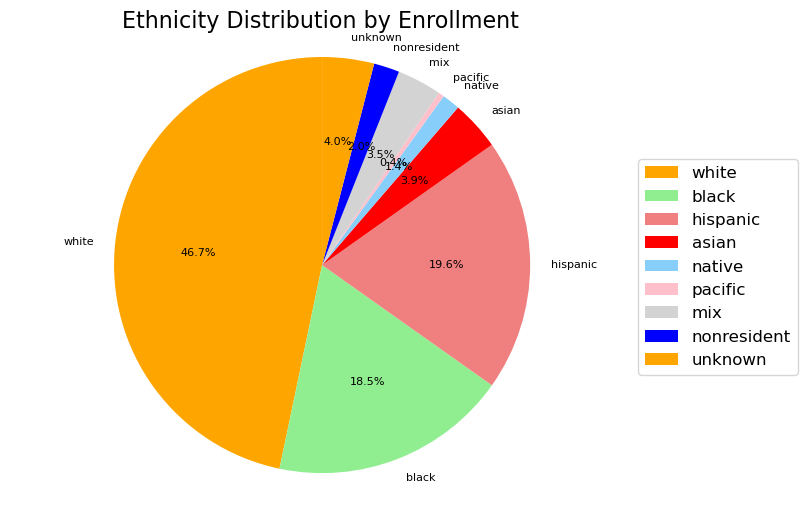

In [89]:
# Extract the required columns from the DataFrame
ethnicity_data = test_ethnicity_clean[[
    "enrollment_proportion_white",
    "enrollment_proportion_black",
    "enrollment_proportion_hispanic",
    "enrollment_proportion_asian",
    "enrollment_proportion_native",
    "enrollment_proportion_pacific",
    "enrollment_proportion_mix",
    "enrollment_proportion_nonresident",
    "enrollment_proportion_unknown"
]]

# Rename the columns to desired labels
ethnicity_data.columns = [
    "white",
    "black",
    "hispanic",
    "asian",
    "native",
    "pacific",
    "mix",
    "nonresident",
    "unknown"
]

# Count the occurrences of each ethnicity category
ethnicity_counts = ethnicity_data.sum().values

# Calculate the percentage of each ethnicity
total = sum(ethnicity_counts)
ethnicity_percentages = [count / total * 100 for count in ethnicity_counts]

# Define a custom color scheme
colors = ['orange', 'lightgreen', 'lightcoral', 'red', 'lightskyblue', 'pink', 'lightgray', 'blue']

# Plot the pie chart
plt.figure(figsize=(8, 6))  # Adjust the figure size as desired
patches, texts, _ = plt.pie(ethnicity_percentages, labels=ethnicity_data.columns, autopct='%1.1f%%', colors=colors,
                            startangle=90, textprops={'fontsize': 8}, labeldistance=1.1)  # Increase labeldistance

# Add a title
plt.title('Ethnicity Distribution by Enrollment', fontsize=16)  # Increase the fontsize for better visibility

# Create a legend outside the pie chart
plt.legend(patches, ethnicity_data.columns, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

# Make the pie chart circular
plt.axis('equal')

# Display the chart
plt.show()




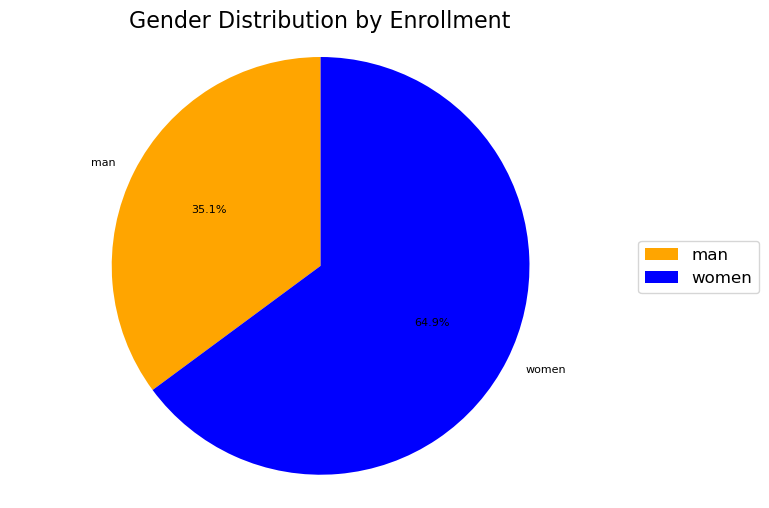

In [88]:
# Extract the required columns from the DataFrame
gender_data = test_ethnicity_clean[["enrollment_percentage_man", "enrollment_percentage_women"]]

# Remove "enrollment_percentage_" prefix from column names
column_names = [col.replace("enrollment_percentage_", "") for col in gender_data.columns]

# Calculate the sum of each gender category
gender_counts = gender_data.sum().values

# Calculate the total count
total = sum(gender_counts)

# Calculate the percentage of each gender
gender_percentages = [count / total * 100 for count in gender_counts]

# Define a custom color scheme
colors = ['orange', 'blue']

# Plot the pie chart
plt.figure(figsize=(8, 6))
patches, _, _ = plt.pie(gender_percentages, labels=column_names, autopct='%1.1f%%', colors=colors,
                        startangle=90, textprops={'fontsize': 8}, labeldistance=1.1)

# Add a title
plt.title('Gender Distribution by Enrollment', fontsize=16)

# Create a legend outside the pie chart
plt.legend(patches, column_names, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

# Make the pie chart circular
plt.axis('equal')

# Display the chart
plt.show()

In [ ]:
## Tuition Visualization on Map
filter_data = pd.merge(test_location_clean, test_financial_clean, on = ['id','name'], how = 'inner')

# Merge the dataframe
tuition_data = filter_data[[
    "id",
    "name",
    "lat",
    "lng",
    "tuition",
    "public/private"
]]
# Transform latitude and longitude to float
tuition_data["lat"] = tuition_data["lat"].astype(float)
tuition_data["lng"] = tuition_data["lng"].astype(float)

# Configure the map plot
tuition_map = tuition_data.hvplot.points(
    "lng",
    "lat",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    size = "tuition",
    scale = 0.05,
    alpha=0.5
)

tuition_map

In [ ]:
# Select relevant columns for institution type data
institution_data = filter_data[["id", "name", "lat", "lng", "public/private"]]

# Convert latitude and longitude columns to float
institution_data["lat"] = institution_data["lat"].astype(float)
institution_data["lng"] = institution_data["lng"].astype(float)

# Define the color mapping for institution types
color_mapping = {1: "blue", 2: "red", 3: "green"}

# Create the map plot
institution_map = institution_data.hvplot.points(
    "lng",
    "lat",
    geo=True,
    tiles="OSM",
    frame_width=700,
    frame_height=500,
    color="public/private",
    cmap=color_mapping,
    alpha=0.5,
    hover_cols=["name", "public/private"],
    legend=True 
)

# Display the plots
institution_map

### 3. Data Analysis

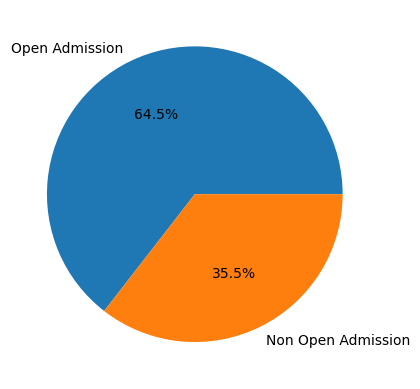

In [76]:
test = pd.merge(test_location_clean, test_financial_clean, on=["id","name"], how= "inner")

indexadm = test[ (test['openadmp'] == 2.0) & (test['openadmp'] == 3.0) ].index
new_clean_df = test.drop(indexadm)


# grouping by open adm to get number of colleges in open and non open

group = new_clean_df.groupby("openadmp")["id"].count()
group_df = pd.DataFrame(group)
group_df_reset = group_df.reset_index()

# displaying percentage of open vs non open colleges

labels = ["Open Admission", "Non Open Admission"]
ax = group_df_reset.plot.pie(y='id', labels=labels, autopct='%1.1f%%')
ax.set_ylabel("")
ax.legend().set_visible(False)
plt.show()

In [77]:
# colleges that are openadm their cost and control
open_adm = new_clean_df.loc[new_clean_df["openadmp"] ==1.0, ["id", "name", "cost_of_admission", "control"]]

# group by colleges by control and average of cost for each group
mean_cost = open_adm.groupby("control")["cost_of_admission"].mean().round()
mean_cost_df = pd.DataFrame(mean_cost)
mean_reset = mean_cost_df.reset_index()

# colleges that are not open admission their cost and control
non_open_adm = new_clean_df.loc[new_clean_df["openadmp"] !=1.0, ["id", "name", "cost_of_admission", "control"]]

# group by colleges by control and average of cost for each group
non_mean_cost = non_open_adm.groupby("control")["cost_of_admission"].mean().round()
non_mean_cost_df = pd.DataFrame(non_mean_cost)
non_mean_reset = non_mean_cost_df.reset_index()

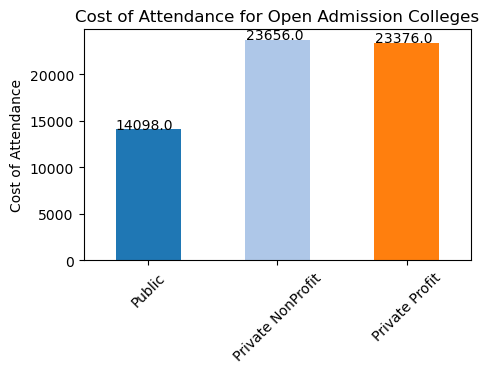

In [78]:
# displaying avg cost of open adm colleges 
# Define a colormap

num_categories = len(mean_reset['control'].unique())
ax = mean_reset.plot.bar(x= 'control', y='cost_of_admission', color=plt.cm.tab20(range(num_categories)), 
                         title="Cost of Attendance for Open Admission Colleges", figsize=(5,3))
new_labels = ['Public', 'Private NonProfit', 'Private Profit']
ax.set_xticklabels(new_labels, rotation=45)
ax.set_xlabel("")
ax.set_ylabel("Cost of Attendance")
ax.legend().set_visible(False)


for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

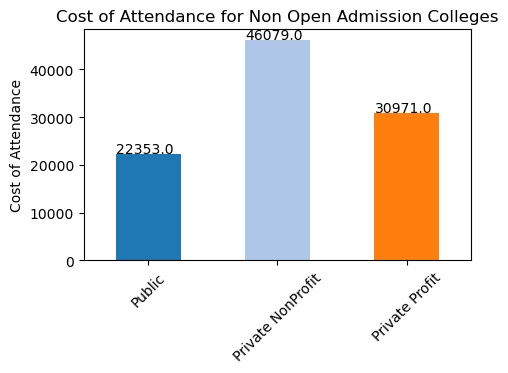

In [79]:
# displaying avg cost of open adm colleges 
non_num_categories = len(non_mean_reset['control'].unique())

ax = non_mean_reset.plot.bar(x= 'control', y='cost_of_admission', color=plt.cm.tab20(range(num_categories)), 
                         title="Cost of Attendance for Non Open Admission Colleges", figsize=(5,3))
non_new_labels = ['Public', 'Private NonProfit', 'Private Profit']
ax.set_xticklabels(new_labels, rotation=45)
ax.set_xlabel("")
ax.set_ylabel("Cost of Attendance")
ax.legend().set_visible(False)


for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

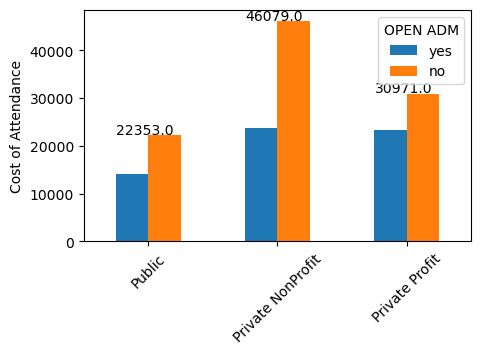

In [82]:
# merging open and non open data frames

combine = new_clean_df.groupby(["openadmp", "control"])["cost_of_admission"].mean().round()
combine_df = pd.DataFrame(combine)
combine_df_reset = combine_df.reset_index()

pivot = pd.pivot_table(data=combine_df_reset, index=['control'], 
                       columns=['openadmp'], values='cost_of_admission')

cb = pivot.plot( kind='bar', figsize=(5,3))
combined_labels = ['Public', 'Private NonProfit', 'Private Profit']
cb.set_xticklabels(combined_labels, rotation=45)
cb.set_xlabel("")
cb.set_ylabel("Cost of Attendance")
plt.legend(["yes", "no"], title="OPEN ADM")
for p in ax.patches:
    cb.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

### 4. Conclustion